In [1]:
# 1. Import Required Libraries
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [27]:
# 2. Mount Drive and Load Data
# ==============================
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/MicrosoftStock.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...,...
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


In [29]:
df = df.drop(columns=['index'])

In [30]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [31]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [32]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


In [33]:
df

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...
2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1259 non-null   float64
 1   high    1259 non-null   float64
 2   low     1259 non-null   float64
 3   close   1259 non-null   float64
 4   volume  1259 non-null   int64  
 5   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.9+ KB


In [35]:
df.isna().sum()

,0
open,0
high,0
low,0
close,0
volume,0
Name,0


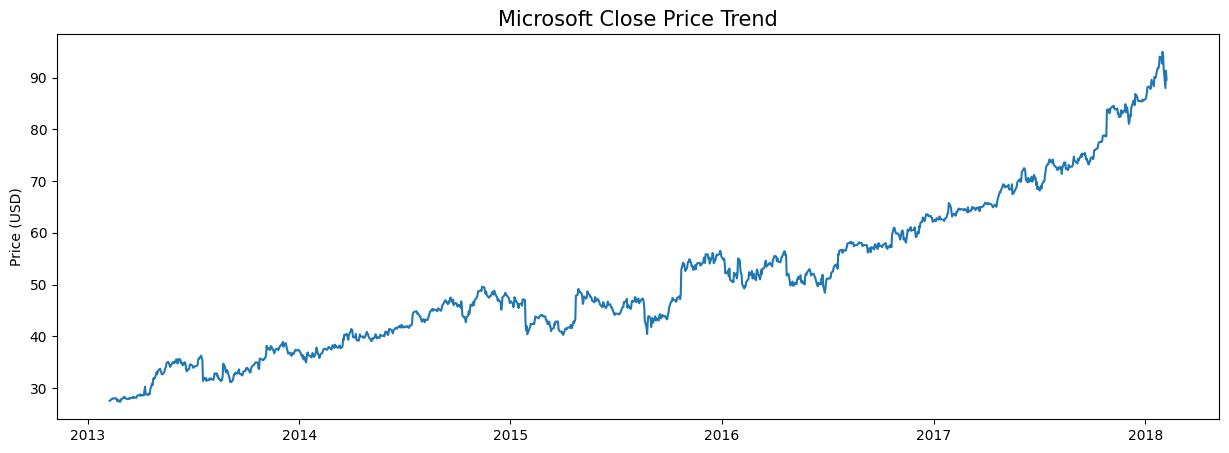

In [36]:
# 4. Plot Close Price
# ==============================
plt.figure(figsize=(15, 5))
plt.plot(df['close'])
plt.title('Microsoft Close Price Trend', fontsize=15)
plt.ylabel('Price (USD)')
plt.show()


In [37]:
# 5. Technical Indicators
# ==============================
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()
df['BB_Middle'] = df['close'].rolling(window=20).mean()
df['BB_Upper'] = df['BB_Middle'] + (df['close'].rolling(window=20).std() * 2)
df['BB_Lower'] = df['BB_Middle'] - (df['close'].rolling(window=20).std() * 2)

In [38]:
# RSI
window = 14
delta = df['close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=window).mean()
avg_loss = pd.Series(loss).rolling(window=window).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

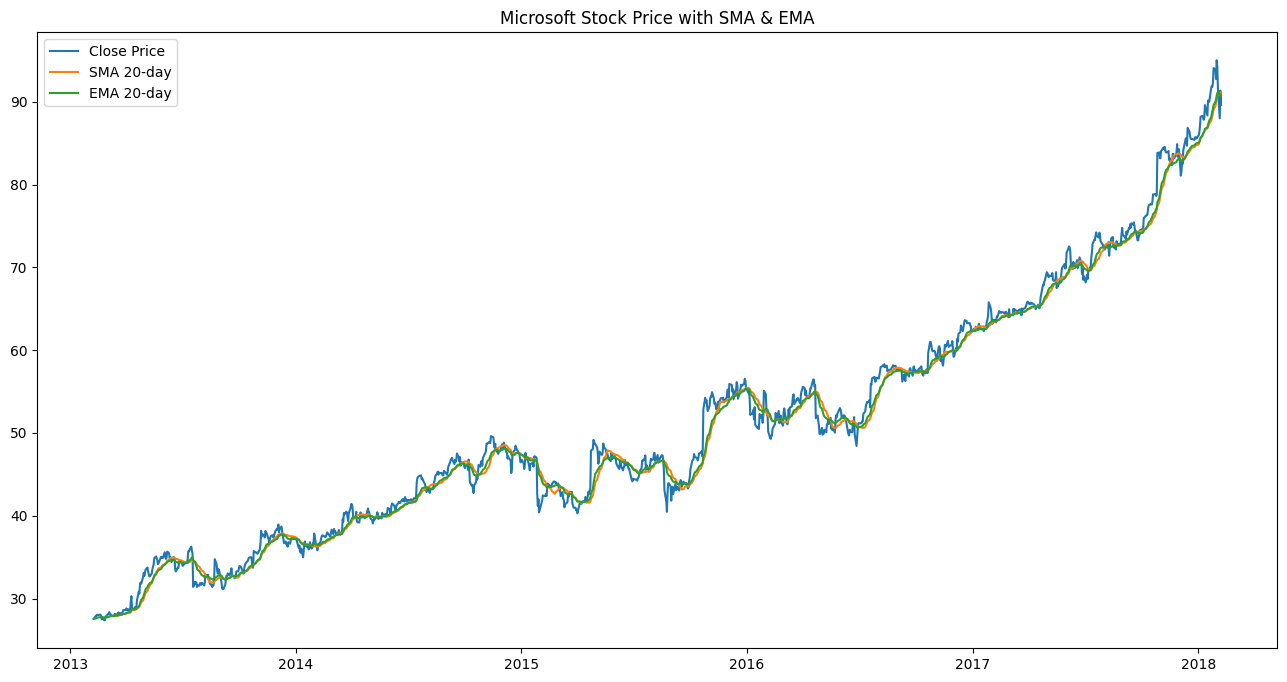

In [39]:
# 6. Plot SMA, EMA & Bollinger Bands
# ==============================
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20-day')
plt.plot(df['EMA_20'], label='EMA 20-day')
plt.title('Microsoft Stock Price with SMA & EMA')
plt.legend()
plt.show()

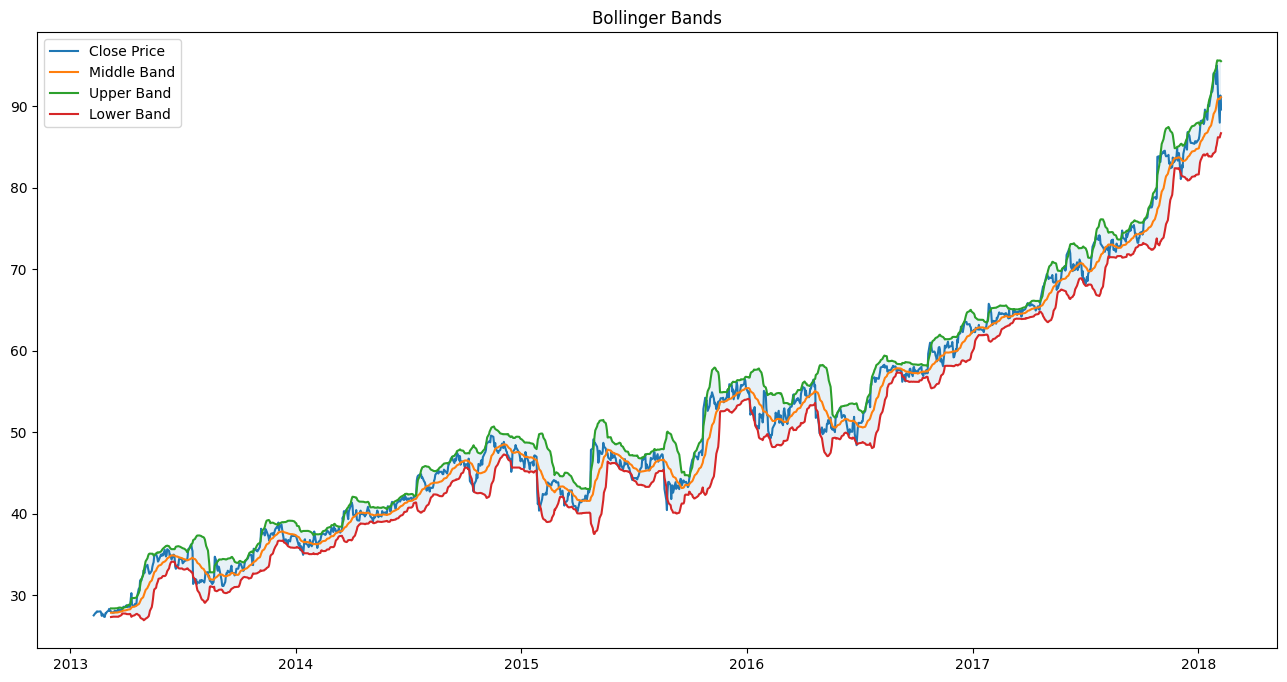

In [40]:
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price')
plt.plot(df['BB_Middle'], label='Middle Band')
plt.plot(df['BB_Upper'], label='Upper Band')
plt.plot(df['BB_Lower'], label='Lower Band')
plt.fill_between(df.index, df['BB_Lower'], df['BB_Upper'], alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()
plt.show()

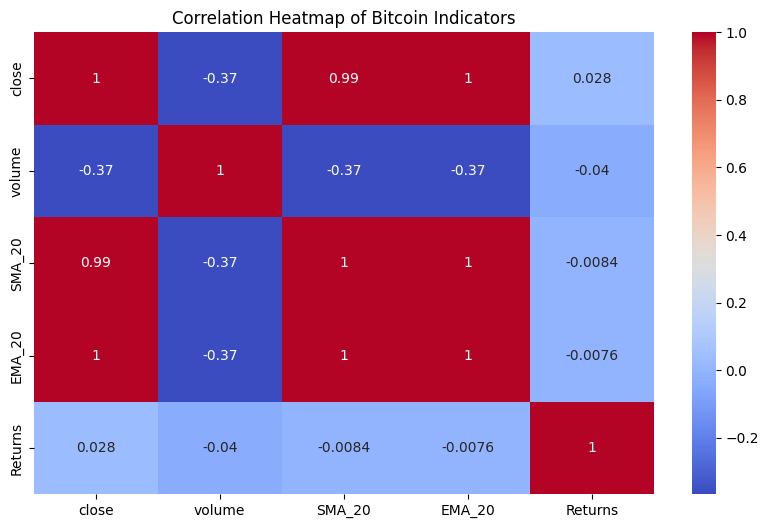

In [42]:
# 7. Correlation Heatmap
# ==============================
df['Returns'] = df['close'].pct_change()
corr_data = df[['close', 'volume', 'SMA_20', 'EMA_20', 'Returns']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Bitcoin Indicators')
plt.show()

In [44]:
# 8. Prepare Data for ML Models
# ==============================
df1 = df[['open', 'high', 'low', 'close', 'volume']].copy()
df1['Target'] = df1['close'].shift(-1)
df1.dropna(inplace=True)

X = df1[['open', 'high', 'low', 'close', 'volume']]
y = df1['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# 9. Linear Regression
# ==============================
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("\n=== LINEAR REGRESSION ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))


=== LINEAR REGRESSION ===
RMSE: 0.8278256710062794
R²: 0.9899962937544781


In [46]:
# 10. Random Forest
# ==============================
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\n=== RANDOM FOREST ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))



=== RANDOM FOREST ===
RMSE: 13.128615339839923
R²: -1.51606003030644


In [47]:
# 11. XGBoost
# ==============================
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("\n=== XGBOOST ===")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R²:", r2_score(y_test, y_pred_xgb))


=== XGBOOST ===
RMSE: 13.502516048296167
R²: -1.66141472258552


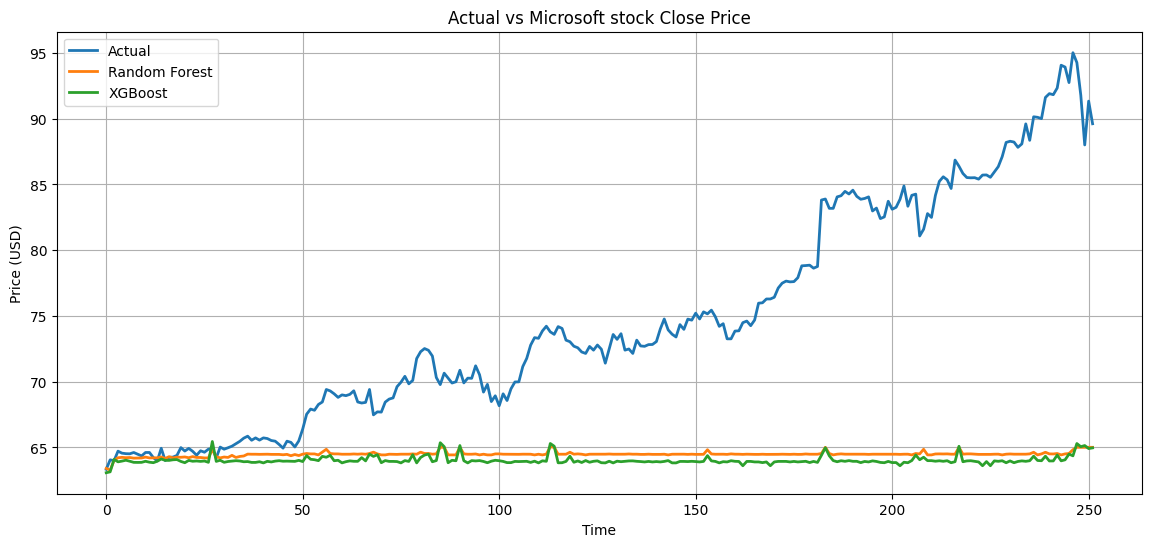

In [48]:
# 13. Plot Actual vs Predicted
# ==============================
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred_rf, label='Random Forest', linewidth=2)
plt.plot(y_pred_xgb, label='XGBoost', linewidth=2)
plt.title('Actual vs Microsoft stock Close Price')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# 13. LSTM MODEL
# ==============================
# Select Close price only
data = df1[['close']].values
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_lstm.fit_transform(data)
scaled_data

array([[0.00266115],
       [0.00724423],
       [0.00753992],
       ...,
       [0.95224719],
       [0.8963631 ],
       [0.94559432]])

In [50]:
# Split into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

In [51]:
train_size

1006

In [52]:
train_data
test_data

array([[0.48492017],
       [0.46318746],
       [0.46791839],
       [0.45461266],
       [0.46570077],
       [0.47723241],
       [0.49186872],
       [0.48758131],
       [0.49512123],
       [0.49896511],
       [0.48832052],
       [0.49024246],
       [0.49142519],
       [0.49852158],
       [0.48625074],
       [0.47057954],
       [0.47131875],
       [0.48565937],
       [0.48166765],
       [0.50266115],
       [0.49733885],
       [0.51153164],
       [0.51448847],
       [0.52646363],
       [0.52202839],
       [0.52054997],
       [0.51641041],
       [0.53592549],
       [0.53474276],
       [0.53474276],
       [0.5348906 ],
       [0.53030751],
       [0.53089888],
       [0.52661147],
       [0.5252809 ],
       [0.51404494],
       [0.52054997],
       [0.51641041],
       [0.51641041],
       [0.52439385],
       [0.52143702],
       [0.52114134],
       [0.5295683 ],
       [0.52099349],
       [0.52232407],
       [0.51981076],
       [0.51936724],
       [0.516

In [53]:
len(train_data)

1006

In [54]:
# Prepare training data
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

In [55]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [56]:
# Test
X_test, y_test_lstm = [], scaled_data[train_size:, 0]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test).reshape(-1, 60, 1)

In [57]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0294
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0025
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0017
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0013
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0012
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0012
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0011
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0011
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0011
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 9.1568e-04
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0014
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 9.2958e-04
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.5789e-04
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 9.4041e-04
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - l

In [58]:
# Testing / Validation
# ==============================
X_test, y_test_lstm = [], scaled_data[train_size:, 0]
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60:i, 0])

X_test = np.array(X_test).reshape(-1, 60, 1)

In [59]:
X_test

array([[[0.48492017],
        [0.46318746],
        [0.46791839],
        ...,
        [0.52927262],
        [0.53681254],
        [0.53622117]],

       [[0.46318746],
        [0.46791839],
        [0.45461266],
        ...,
        [0.53681254],
        [0.53622117],
        [0.5331165 ]],

       [[0.46791839],
        [0.45461266],
        [0.46570077],
        ...,
        [0.53622117],
        [0.5331165 ],
        [0.53178593]],

       ...,

       [[0.84417504],
        [0.84121821],
        [0.84550562],
        ...,
        [0.96643998],
        [1.        ],
        [0.98891189]],

       [[0.84121821],
        [0.84550562],
        [0.83855707],
        ...,
        [1.        ],
        [0.98891189],
        [0.95224719]],

       [[0.84550562],
        [0.83855707],
        [0.83530455],
        ...,
        [0.98891189],
        [0.95224719],
        [0.8963631 ]]])

In [60]:
# Predictions
predictions = model.predict(X_test)
predictions = scaler_lstm.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


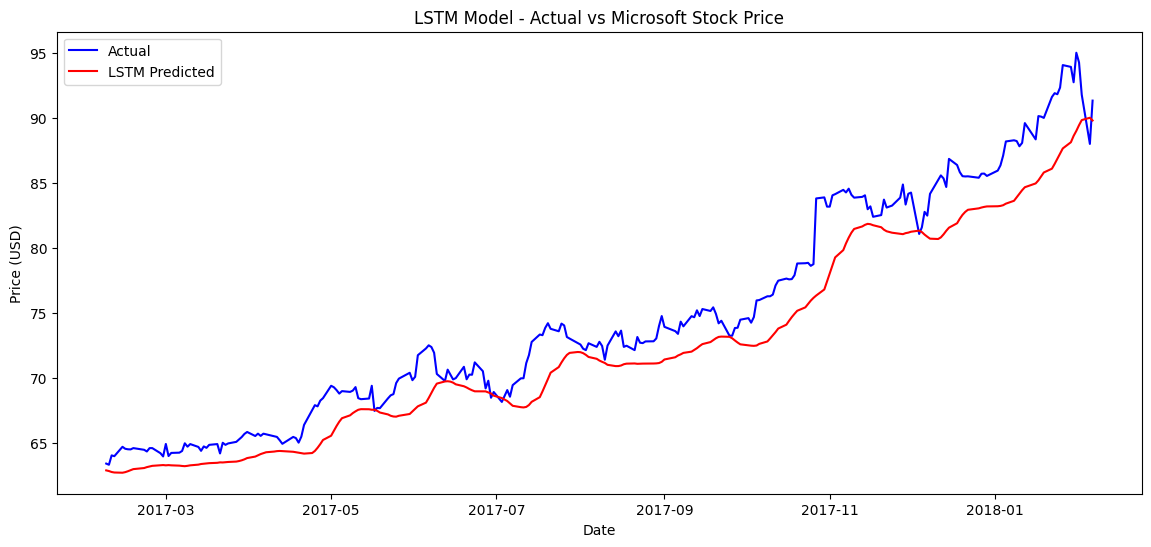

In [61]:
# Plot Actual vs Predicted
# ==============================
plt.figure(figsize=(14, 6))
plt.plot(df1.index[train_size:], data[train_size:], label="Actual", color='blue')
plt.plot(df1.index[train_size:], predictions, label="LSTM Predicted", color='red')
plt.title("LSTM Model - Actual vs Microsoft Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [62]:
# 15. 60-Day Future Forecast
# ==============================
future_days = 30
future_input = scaled_data[-30:].reshape(1, 30, 1)
future_scaled = []

for _ in range(future_days):
    next_pred = model.predict(future_input)[0, 0]
    future_scaled.append(next_pred)
    new_input = np.append(future_input[0, 1:, 0], next_pred).reshape(1, 30, 1)
    future_input = new_input

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In [63]:
# Inverse transform future predictions
future_preds = scaler_lstm.inverse_transform(np.array(future_scaled).reshape(-1, 1))

In [64]:
# Create future forecast DataFrame with sequential day numbers
future_df = pd.DataFrame({
    'Day Ahead': np.arange(1, future_days + 1),
    'Predicted Close Price (USD)': future_preds.flatten()
})

In [65]:
# Print the first 10 and last 10 predicted days
print("\n🔮 Next 10 Predicted Days:")
print(future_df.head(10))
print("\n🔮 Last 10 Predicted Days:")
print(future_df.tail(10))


🔮 Next 10 Predicted Days:
   Day Ahead  Predicted Close Price (USD)
0          1                    89.656708
1          2                    89.320610
2          3                    88.918793
3          4                    88.476387
4          5                    88.009598
5          6                    87.529030
6          7                    87.041969
7          8                    86.552742
8          9                    86.064415
9         10                    85.578941

🔮 Last 10 Predicted Days:
    Day Ahead  Predicted Close Price (USD)
20         21                    80.578392
21         22                    80.160461
22         23                    79.748817
23         24                    79.344154
24         25                    78.945000
25         26                    78.550743
26         27                    78.163666
27         28                    77.781471
28         29                    77.403145
29         30                    77.028084


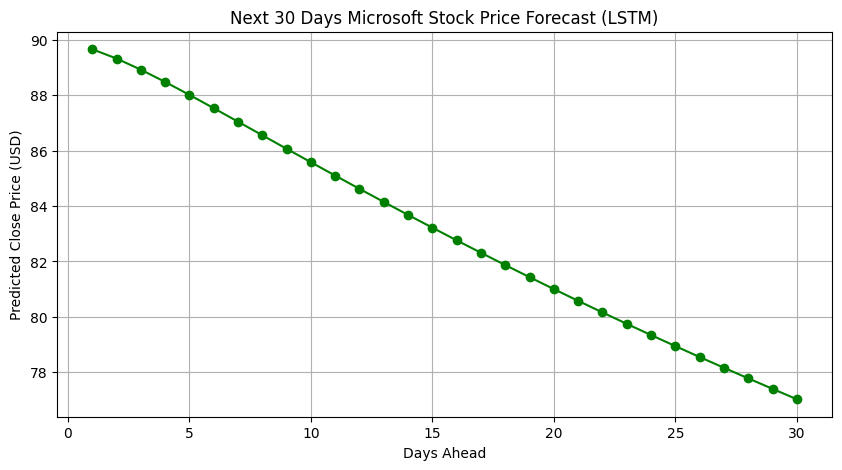

In [66]:
# Plot future forecast (same style as before)
plt.figure(figsize=(10, 5))
plt.plot(future_df['Day Ahead'], future_df['Predicted Close Price (USD)'],
         marker='o', color='green')
plt.title("Next 30 Days Microsoft Stock Price Forecast (LSTM)")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Close Price (USD)")
plt.grid(True)
plt.show()